## Diagnosing Diabetes: EDA Project

#### Summary
 This notebook analyzes a dataset related to diabetes diagnosis. The workflow includes:
 1. **Loading the Dataset**: Importing the dataset for analysis.
 2. **Basic Information and Cleaning**: Exploring data structure, identifying missing values, and cleaning the dataset.
 3. **Data Exploration (EDA)**: Visualizing key features, analyzing correlations, and uncovering patterns.
 4. **Feature Engineering**: Creating new features such as age categories to enhance analysis.
 5. **Exporting Cleaned Data**: Saving the cleaned dataset for further use. This is optional and there is no need to do this here
 6. **Conclusion**: Summarizing key findings and insights.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases.


##### Firts we import our librearies that will help us to study the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.  Loading the Dataset


In [2]:
data_path = 'diabetes.csv'
diabetes_data = pd.read_csv(data_path)

#### 2. Basic Dataset Information



display the first rows of the data

In [3]:
display(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Checking the number of rows and columns of this data to se how long it is

In [4]:
print(f" The total number of rows is: {len(diabetes_data)}")
print(f" The total Number of columns is: {len(diabetes_data.columns)}")

 The total number of rows is: 768
 The total Number of columns is: 9


Check if we have missing values

In [5]:
data_missing = diabetes_data.isnull().sum()
print("Missing values:\n", data_missing)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


###### Luckily, we don´t have any missing value in this data. This is important to know in advance, but we will go over this again to see how data can be sometimes hidden or confusing.

Now lets explore some basic statics like mean, min and max, standard deviation, etc. We can use de **describe()** funcionality for a quick look

In [6]:
data_summary = diabetes_data.describe()
print("Basic Summary statistics:\n", data_summary)

Basic Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000 

#### 3. Data Cleaning



We will replace zero values with NaN for specific columns

In [7]:
# we select our columns to replace
anomalous_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#we apply the replacement
diabetes_data[anomalous_columns] = diabetes_data[anomalous_columns].replace(0, np.nan)

Now we check again for missing values after replacement


In [8]:
print("Missing values after cleaning:\n", diabetes_data.isnull().sum())

Missing values after cleaning:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


What happened here? We see that we do have some missing values or data, but was stored before with values of "0", wich probably can be seen also as missing data. We can see that the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI have import 

Display rows with missing (null) values


In [9]:
missing_rows = diabetes_data[diabetes_data.isnull().any(axis=1)]
print("Rows with missing values:\n", missing_rows)

Rows with missing values:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age Outcome  
0                       0.627   50     

In [10]:
print("\n Total number of missing rows:")
print(len(missing_rows))


 Total number of missing rows:
376


In [11]:
# Replace 'O' with 0 in the Outcome column
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace('O', 0)

##### In this cases, one solution is to apply the median value to replace all the empty values. Let´s do that now:

In [12]:
# Filling missing values with median
diabetes_data.fillna(diabetes_data.median(numeric_only=True), inplace=True)

####  4. Data Exploration


##### Checking data types and unique values for the Outcome column


In [13]:
print("Data types:\n", diabetes_data.dtypes)
print("Unique values in 'Outcome':", diabetes_data.Outcome.unique())

Data types:
 Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object
Unique values in 'Outcome': ['1' '0' 0]


We see that Outcome column is from and object type (possibly with *strings* data types values), so we will have to change it to numeric data type. So, we will convert this column to be a integer type

In [14]:
# Ensuring consistency in 'Outcome' column
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace('O', 0).astype('int64')
print("Updated data types:\n", diabetes_data.dtypes)

Updated data types:
 Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


#### 5. Exploratory Data Analysis (EDA)

We can use a heatmap for this to explore the correlation between variables

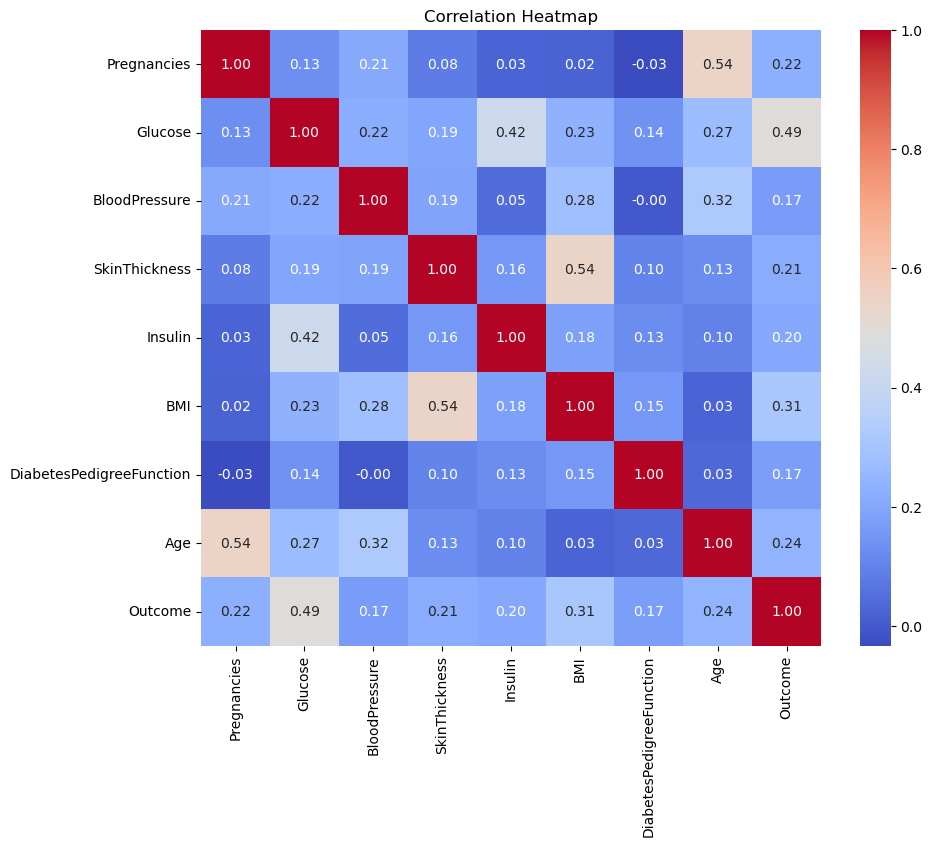

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Also we can see the distribution plots of key features interesting values and indicators to see the distribution and their relationship


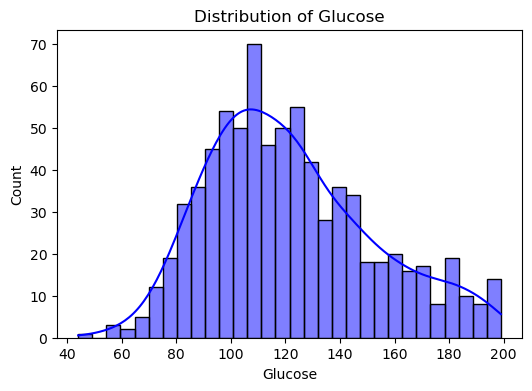

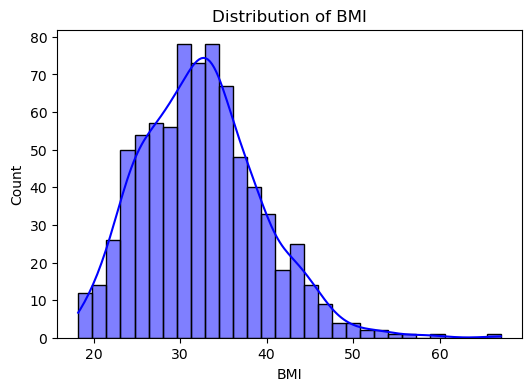

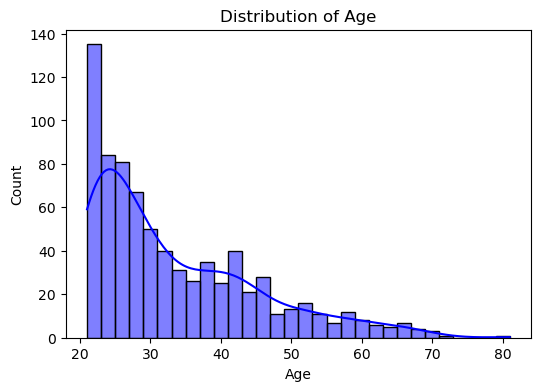

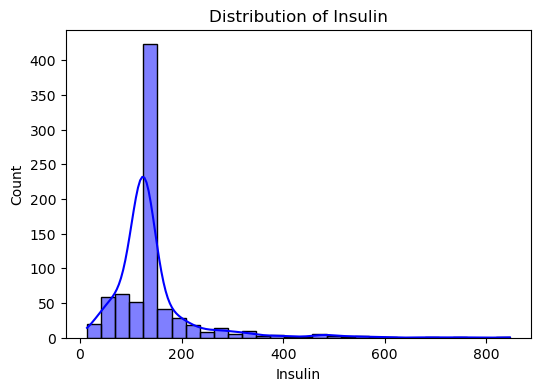

In [16]:
features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetes_data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

Analyzing outcomes based on key features. A box plot is a good idea for show this.


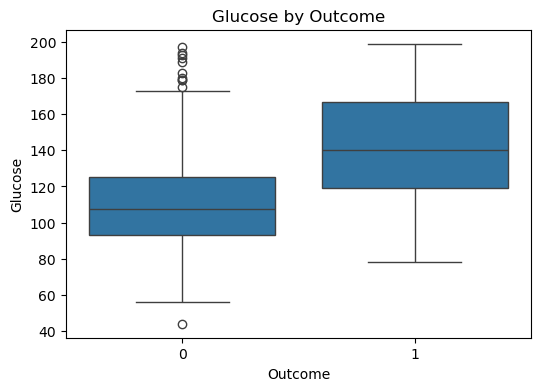

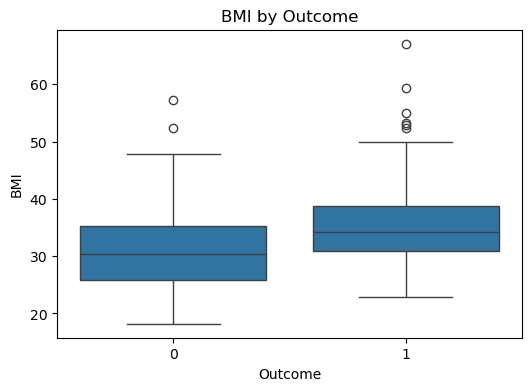

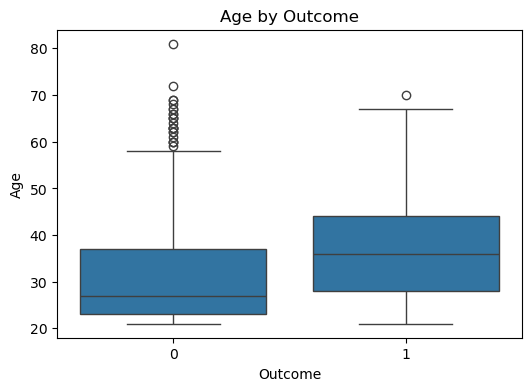

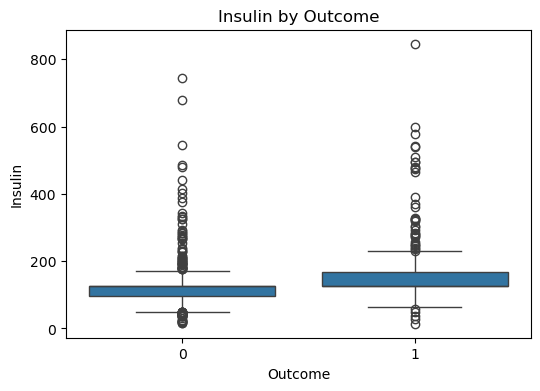

In [17]:
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data = diabetes_data)
    plt.title(f'{feature} by Outcome')
    plt.show()

At last, we can one more analysis: analyzing outcomes by age group. For this we need to create a new column and use it to show some key point.

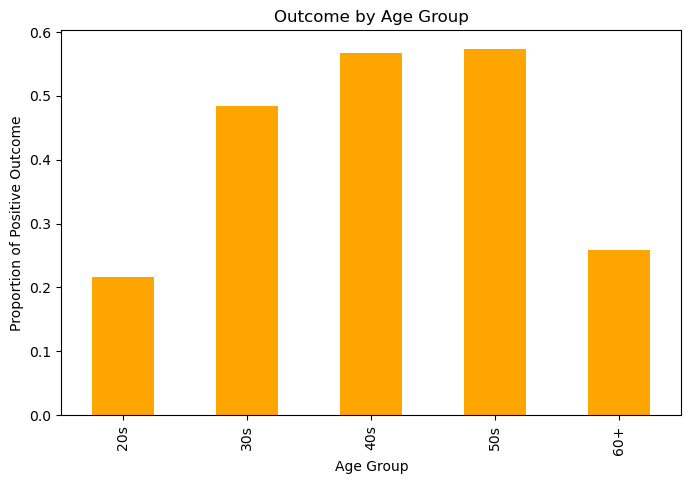

In [18]:
diabetes_data['AgeGroup'] = pd.cut(diabetes_data['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])
age_group_outcome = diabetes_data.groupby('AgeGroup', observed=False)['Outcome'].mean()
plt.figure(figsize=(8, 5))
age_group_outcome.plot(kind='bar', color='orange')
plt.title('Outcome by Age Group')
plt.ylabel('Proportion of Positive Outcome')
plt.xlabel('Age Group')
plt.show()

#### 6. Conclusion
Key Findings:
1. The features Glucose and BMI have the strongest correlation with the Outcome variable.
2. Age groups 50+ show a higher proportion of positive outcomes (diabetes diagnosis).
3. Missing values were imputed using median values to preserve data integrity.
4. Adding AgeGroup as a feature provided additional insights into diabetes risk trends.
